In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import os
from PIL import Image
print(os.listdir("./common/data"))

import tensorflow as tf
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
tf.compat.v1.keras.backend.set_session(tf.compat.v1.Session(config=config))

# Keras Libraries
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

['chest_xray', 'resampled', 'TEST']


Using TensorFlow backend.


# Resample Data Into New Dataset

# Resample Train Data

In [2]:
from common.src import resample as res

In [3]:
from imblearn.over_sampling import SMOTE

path = r'C:\Users\mmitk\dev\2020\pneumonia\common\data\chest_xray\train'
SM = SMOTE(random_state=0)

In [4]:
res.resample_directory(SM, path, 'SMOTE', val = False)

----------[LOADING IMAGES]----------
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
......................
Finished [LOADING IMAGES]
----------[RESAMPLING IMAGES]----------

Finished [RESAMPLING IMAGES]
----------[WRITING RESAMPLED IMAGES]----------
....................................................................................................
....................................................................................................
..........................................................................................

# Load Data

In [5]:
train_folder= './common/data/resampled/SMOTE/train'
val_folder = './common/data/chest_xray/val/'
test_folder = './common/data/chest_xray/test/'

Set up Training Folders

In [6]:
# train 
os.listdir(train_folder)
train_n = train_folder+'NORMAL/'
train_p = train_folder+'PNEUMONIA/'

Set up Testing Folders

In [7]:
# test
os.listdir(test_folder)
train_n = test_folder+'NORMAL/'
train_p = test_folder+'PNEUMONIA/'

# Generate Dataset from image data

In [8]:
from common.src import util

train_datagen = util.create_train_datagen()
test_datagen = util.create_test_datagen()

training_set = util.create_generator_set(train_datagen, './common/data/resampled/SMOTE/train')
validation_generator = util.create_generator_set(test_datagen, './common/data/chest_xray/val/')
test_set = util.create_generator_set(test_datagen, './common/data/chest_xray/test/', batch_size = 1, shuffle = False) 

Found 7750 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


# Create Model

In [9]:
from common.src import models

cnn = models.CNNModel(patience_s=19)
cnn.create_model()
cnn.summary()

# Fit Model

In [10]:
cnn_model = cnn.fit_generator(training_set, validation_generator, epochs=20)

Epoch 1/20
163/163 [==============================] - 11s 70ms/step - loss: 0.2879 - tp: 4534.0000 - fp: 677.0000 - tn: 4513.0000 - fn: 656.0000 - accuracy: 0.8716 - precision: 0.8701 - recall: 0.8736 - auc: 0.9491 - val_loss: 0.3985 - val_tp: 228.0000 - val_fp: 38.0000 - val_tn: 266.0000 - val_fn: 76.0000 - val_accuracy: 0.8125 - val_precision: 0.8571 - val_recall: 0.7500 - val_auc: 0.8926
Epoch 2/20
163/163 [==============================] - 10s 60ms/step - loss: 0.1971 - tp: 4762.0000 - fp: 423.0000 - tn: 4767.0000 - fn: 428.0000 - accuracy: 0.9180 - precision: 0.9184 - recall: 0.9175 - auc: 0.9762 - val_loss: 0.5073 - val_tp: 228.0000 - val_fp: 76.0000 - val_tn: 228.0000 - val_fn: 76.0000 - val_accuracy: 0.7500 - val_precision: 0.7500 - val_recall: 0.7500 - val_auc: 0.8477
Epoch 3/20
163/163 [==============================] - 10s 64ms/step - loss: 0.1942 - tp: 4787.0000 - fp: 425.0000 - tn: 4791.0000 - fn: 429.0000 - accuracy: 0.9181 - precision: 0.9185 - recall: 0.9178 - auc: 0.97

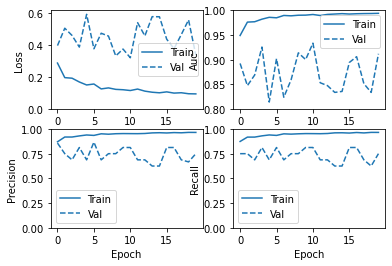

In [11]:
cnn.plot_history()

In [12]:
cnn.get_classification_report(test_set)

              precision    recall  f1-score   support

      NORMAL       0.81      0.82      0.81       234
   PNEUMONIA       0.89      0.88      0.89       390

    accuracy                           0.86       624
   macro avg       0.85      0.85      0.85       624
weighted avg       0.86      0.86      0.86       624



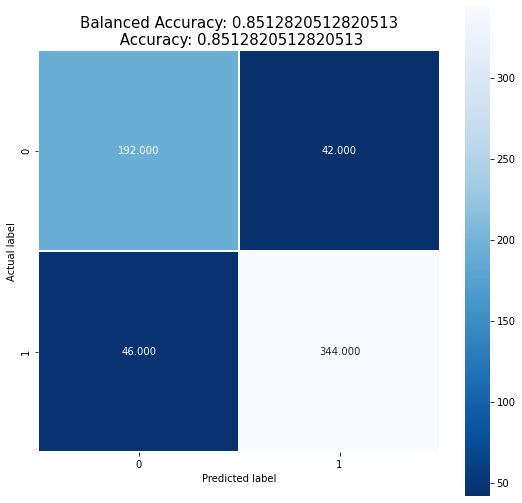

In [13]:
cnn.display_confusion_matrix(test_set)